In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

# 1 Data Exploration

In [3]:
menu = pd.read_csv("menu.csv")

In [4]:
menu.shape

(260, 24)

In [5]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### (a)

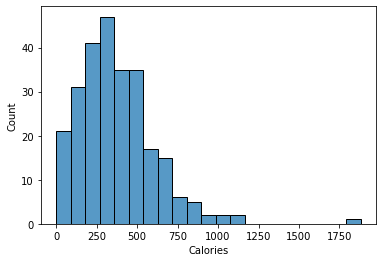

In [6]:
sns.histplot(menu, x = "Calories")

- Nominal: `Category`, `Item`
- Quantity (Ratio, Continuous): `Serving Size`, `Calories`, `Calories from Fat`, `Total Fat`, `Total Fat (% Daily Value)`, `Saturated Fat`, `Saturated Fat (% Daily Value)`, `Trans Fat`, `Cholesterol`, `Cholesterol (% Daily Value)`, `Sodium`, `Sodium (% Daily Value)`, `Carbohydrates`, `Carbohydrates (% Daily Value)`, `Dietary Fiber`, `Dietary Fiber (% Daily Value)`, `Sugars`, `Protein`, `Vitamin A (% Daily Value)`, `Vitamin C (% Daily Value)`, `Calcium (% Daily Value)`, `Iron (% Daily Value)`


### (b)

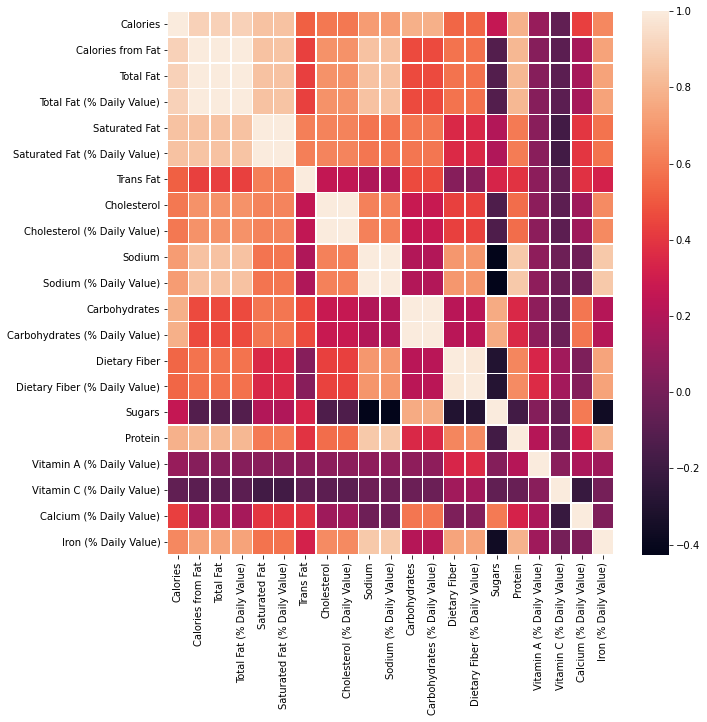

In [7]:
corr = menu.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,  linewidths=.5, ax=ax)

Diagonal elements are always 1 because a feature's correlation with itself is always 1.

### (c)

In [8]:
corr['Calories']

Calories                         1.000000
Calories from Fat                0.904588
Total Fat                        0.904409
Total Fat (% Daily Value)        0.904123
Saturated Fat                    0.845564
Saturated Fat (% Daily Value)    0.847631
Trans Fat                        0.522441
Cholesterol                      0.596399
Cholesterol (% Daily Value)      0.595208
Sodium                           0.712309
Sodium (% Daily Value)           0.713415
Carbohydrates                    0.781539
Carbohydrates (% Daily Value)    0.781242
Dietary Fiber                    0.538894
Dietary Fiber (% Daily Value)    0.540014
Sugars                           0.259598
Protein                          0.787847
Vitamin A (% Daily Value)        0.108844
Vitamin C (% Daily Value)       -0.068747
Calcium (% Daily Value)          0.428426
Iron (% Daily Value)             0.643552
Name: Calories, dtype: float64

#### Second largest correlation: `Protein`

#### Third largest correlation: `Carbohydrates`

### (d)


Features with negative correlation with Calories: `Vitamin C (% Daily Value)`

The correlation is slightly below zero

It make sense since most food doesn't contains Vitamin C and the food that does contain Vitamin C usually have less calories, such as fruit and jucie. 

In [9]:
menu.sort_values("Vitamin C (% Daily Value)", ascending = False).head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
135,Beverages,Minute Maid Orange Juice (Large),22 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,65,22,0,0,58,4,0,240,4,0
134,Beverages,Minute Maid Orange Juice (Medium),16 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,44,15,0,0,39,3,0,160,4,0
101,Snacks & Sides,Apple Slices,1.2 oz (34 g),15,0,0.0,0,0.0,0,0.0,...,4,1,0,0,3,0,0,160,2,0
133,Beverages,Minute Maid Orange Juice (Small),12 fl oz cup,150,0,0.0,0,0.0,0,0.0,...,34,11,0,0,30,2,0,130,2,0
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,9.6 oz (251 g),260,40,4.0,6,1.5,8,0.0,...,49,16,5,22,18,5,2,130,6,10


# 2 Plotting

### (a)

[Text(0.5, 1.0, 'Protein vs Calories')]

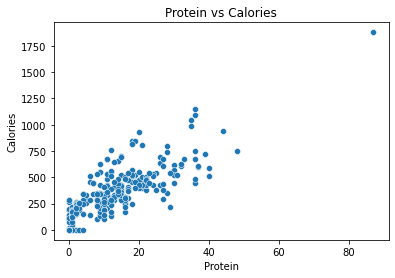

In [10]:
sns.scatterplot(data = menu, x = "Protein", y = "Calories").set(
    title = "Protein vs Calories")

[Text(0.5, 1.0, 'Carbohydrates vs Calories')]

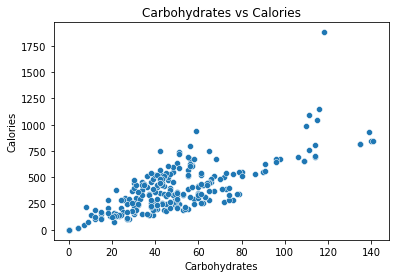

In [11]:
sns.scatterplot(data = menu, x = "Carbohydrates", y = "Calories").set(
    title = "Carbohydrates vs Calories")

[Text(0.5, 1.0, 'Vitamin C (% Daily Value) vs Calories')]

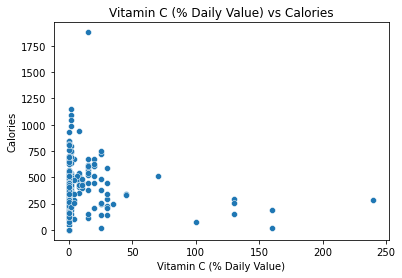

In [12]:
sns.scatterplot(data = menu, x = "Vitamin C (% Daily Value)", y = "Calories").set(
    title = "Vitamin C (% Daily Value) vs Calories")

### (b)

[Text(0.5, 1.0, 'Protein')]

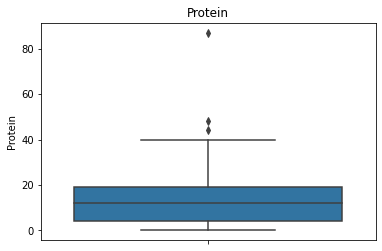

In [13]:
sns.boxplot(data = menu, y = "Protein").set(
    title = "Protein")

[Text(0.5, 1.0, 'Carbohydrates')]

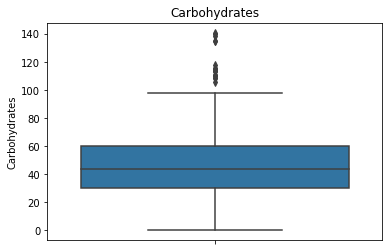

In [14]:
sns.boxplot(data = menu, y = "Carbohydrates").set(
    title = "Carbohydrates")

[Text(0.5, 1.0, 'Vitamin C (% Daily Value)')]

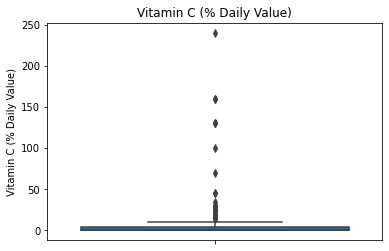

In [15]:
sns.boxplot(data = menu, y = "Vitamin C (% Daily Value)").set(
    title = "Vitamin C (% Daily Value)")

# 3 Data Pre-processing

### (a)

In [16]:
std = menu.std().rename("Standard Deviation").to_frame()
med = menu.median().rename("Median").to_frame()
stats = std.merge(med,left_index= True, right_index=True)
stats

,Standard Deviation,Median
Calories,240.269886,340.0
Calories from Fat,127.875914,100.0
Total Fat,14.205998,11.0
Total Fat (% Daily Value),21.885199,17.0
Saturated Fat,5.321873,5.0
Saturated Fat (% Daily Value),26.639209,24.0
Trans Fat,0.429133,0.0
Cholesterol,87.269257,35.0
Cholesterol (% Daily Value),29.091653,11.0
Sodium,577.026323,190.0


### (b)

In [17]:
for col in menu.columns:
    if col in stats.index:
        mean_ = menu[col].mean()
        std_ = menu[col].std()
        menu[col] = menu[col].apply(
            lambda val: val if abs(val - mean_) <= 3*std_ else np.NaN )

In [18]:
menu.isna().sum().rename("Number of NaNs").to_frame()

,Number of NaNs
Category,0
Item,0
Serving Size,0
Calories,3
Calories from Fat,3
Total Fat,3
Total Fat (% Daily Value),3
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,9


### (c)

In [19]:
for col in menu.columns:
    if col in stats.index:
        mean_ = menu[col].mean()
        menu[col] = menu[col].fillna(mean_)

In [20]:
std = menu.std().rename("Standard Deviation").to_frame()
med = menu.median().rename("Median").to_frame()
stats = std.merge(med,left_index= True, right_index=True)
stats

,Standard Deviation,Median
Calories,210.710032,340.0
Calories from Fat,107.986184,100.0
Total Fat,11.989233,11.0
Total Fat (% Daily Value),18.452357,17.0
Saturated Fat,5.321873,5.0
Saturated Fat (% Daily Value),26.639209,24.0
Trans Fat,0.330815,0.0
Cholesterol,59.444949,35.0
Cholesterol (% Daily Value),19.805418,11.0
Sodium,520.229631,190.0


Observation: Standard Deviations decrease and medians remain the same
Explanation: Replacing outliers with mean makes the data more clustered to mean which lowers the std but doesn't really affect the medians since we only change a small number of data and median is insensitive to outliers.

# 4. Linear Regression

In [21]:
menu = pd.read_csv("menu.csv")

### (a)

In [22]:
mdl1 = LinearRegression().fit(menu[['Carbohydrates', "Protein", "Total Fat"]].values, menu["Calories"])

In [23]:
mdl1.intercept_

-1.8292919301434836

In [24]:
mdl1.coef_

array([3.97896903, 4.04524858, 9.01862206])

$\theta_0$ = -1.8292919301434836 \
$\theta_1$ = 3.97896903 \
$\theta_2$ = 4.0452485 \
$\theta_3$ = 9.01862206

In [25]:
mdl1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

$\theta_0$ is the intercept, which represent the predicted label when all features are zero. \
$\theta_1$, $\theta_2$, $\theta_3$ are the coefficents of each features. The coefficent represents the contribution of each features to the label. It's the slope of the label and the feature. When the feature change by $\delta$, the prediction will change $\delta$ times the coefficient 

### (b)

In [26]:
mdl2 = LinearRegression().fit(menu[["Total Fat"]].values, menu["Calories"])

In [27]:
mdl2.intercept_

151.5881890249318

In [28]:
mdl2.coef_

array([15.29651666])

$\theta_0$ = 151.5881890249318
$\theta_1$ = 15.29651666 \
The coefficents vary significantly. The three features are correlated. When `Total Fat` increase, `Protein`, and `Carbohydrates` are likely to increase since their correlation are possitive. The increment of `Protein` and `Carbohydrates` will lead to a increasement of `Calores`. Therefore, $\theta_1$ is higher. If we multiply the coefficent of the previous model with the feature's coefficient with `Total Fat`, we will get a value close to $\theta_1$. The previous is a four dimension hyperplane but this model is a two dimension line. They intercept the y axis at a different point as this model doesn't have enough information to do a good prediction.

### (c)

In [29]:
train, test = train_test_split(menu.drop(columns = [ 'Category', 'Item', 'Serving Size'])
                               , test_size = 0.1, shuffle = False)

In [30]:
mdl3 = LinearRegression().fit(train.drop(columns = "Calories").values, train["Calories"])
pred = mdl3.predict(train.drop(columns = "Calories").values)
mean_squared_error(pred, train["Calories"])

18.915641610753983

In [31]:
pred = mdl3.predict(test.drop(columns = "Calories").values)
mean_squared_error(pred, test["Calories"])

60.19673200266517

MSE for training set: 18.915641610753983\
MSE for test set: 60.19673200266517\
The model overfits to the training data. The model learns the set of coefficients that best fit the training set but failed to generalized it to the test set. One reason is that we have too much features compare to the complexity of our data and the size of the dataset. The other reason might be that we didn't shuffle the dataset and the data at the end has a trend or a slightly different generated process. For example, suppose our model preform better when calories is low and the end of the dataset is full of food with high calories.

# 5. Logistic Regression

### (a)
Logistic Regression: $ y = \sigma(\sum x_i \theta_i) = \frac{1}{1+e^{- \sum x_i \theta_i}}$ 
$ y = P(label = 1)$ 

$ odds = P(y = 1) / 1 - P(y = 1) $ 

$\Large = \frac{ \frac{1}{1+e^{- \sum x_i \theta_i} }}{ 1- \frac{1}{1+e^{- \sum x_i \theta_i}}} $ 

$\Large = \frac{1}{1+e^{- \sum x_i \theta_i - 1}} $ 

$\Large = \frac{1}{e^{- \sum x_i \theta_i}} $ 

$\Large = e^{\sum x_i \theta_i} $ 

### (b)
Suppose we add 1 to $x_j$

new odd $\Large = {e^{(\sum x_i \theta_i + \theta_j)}}  $ 

ratio $\Large = \frac{e^{(\sum x_i \theta_i + \theta_j)}}{e^{\sum x_i \theta_i}}  $ 

$\Large = e^{\theta_j}$ 

We adding 1 to $x_j$ is equivalent to multiplying the odds by $e^{\theta_j}$. The weights controls how each features contribute to the prediction. If $\theta_j$ is positive, increasing $x_j$ increases the odd. If $\theta_j$ is negative, increasing $x_j$ decreases the odd. Each weight measures how the feature contribute to predicting label 1
